<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding 
from tensorflow.keras.models import Model

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-09-14 10:19:54--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.81.48, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   496KB/s    in 1.0s    

2020-09-14 10:19:56 (496 KB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ['labels', 'data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [10]:
Y = df['b_labels'].values

In [11]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [12]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [14]:
len(tokenizer.word_index)

7265

In [15]:
V = len(tokenizer.word_index) + 1 

In [16]:
V

7266

In [17]:
data_train = pad_sequences(sequences_train)

In [18]:
data_train.shape

(3733, 162)

In [19]:
T = data_train.shape[1]

In [20]:
T

162

In [21]:
data_test = pad_sequences(sequences_test, maxlen=T)

In [22]:
data_test.shape

(1839, 162)

In [41]:
# D is the dimensions of embeddings ie each word to be represented by how many numbers
D = 100


M = 15



i = Input(shape=(T,))
x = Embedding(V, D)(i)

# Now we have N x T x D

x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [42]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [43]:
r = model.fit(
   data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Epoch 1/10
117/117 [==============================] - 3s 25ms/step - loss: 0.3747 - accuracy: 0.8752 - val_loss: 0.1421 - val_accuracy: 0.9788
Epoch 2/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0834 - accuracy: 0.9866 - val_loss: 0.0660 - val_accuracy: 0.9859
Epoch 3/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0358 - accuracy: 0.9946 - val_loss: 0.0570 - val_accuracy: 0.9875
Epoch 4/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0181 - accuracy: 0.9979 - val_loss: 0.0567 - val_accuracy: 0.9869
Epoch 5/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0109 - accuracy: 0.9987 - val_loss: 0.0870 - val_accuracy: 0.9804
Epoch 6/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 0.0641 - val_accuracy: 0.9859
Epoch 7/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0052 - accuracy: 0.9997 - val_loss: 0.0696 - val_accuracy: 0.9853

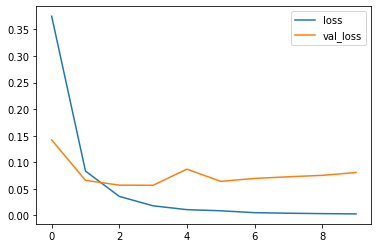

In [44]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

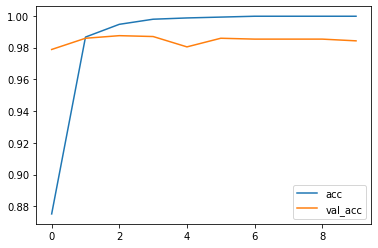

In [45]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()